![Title](https://cdn.greenhouse.io/external_greenhouse_job_boards/logos/000/006/746/original/kiva_logo_tag_green.png?1475791760)

This Kernel takes a look at Kiva and does an exploratory analysis of it. 

# Goals
There are two main goals of this kernel. 
* Learn and apply tricks to work with 

# About Kiva
[Kiva](https://www.kaggle.com/kiva) is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over 1 billion dollars in loans to over 2 million people. To set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import pyplot. 
import matplotlib.pyplot as plt

## in order to show more columns. 
pd.options.display.max_columns = 999

# Any results you write to the current directory are saved as output.a

In [2]:
countries = pd.read_csv('../input/countries-of-the-world/countries of the world.csv')

## From Data Science for good: Kiva funding. 
kiva_loans = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
loan_themes = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')
mpi_region_locations = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv')
theme_id = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv')

## From additional data sources. 
country_stats = pd.read_csv('../input/additional-kiva-snapshot/country_stats.csv')
#all_loans = pd.read_csv('../input/additional-kiva-snapshot/loans.csv')
lenders = pd.read_csv('../input/additional-kiva-snapshot/lenders.csv')
loan_coords = pd.read_csv('../input/additional-kiva-snapshot/loan_coords.csv')
locations = pd.read_csv('../input/additional-kiva-snapshot/locations.csv')

##mpi
mpi_national = pd.read_csv('../input/mpi/MPI_national.csv')
mpi_subnational = pd.read_csv('../input/mpi/MPI_subnational.csv')

#all_data = [kiva_loans, loan_themes, mpi_region_locations, theme_id, country_stats, loans, lenders, loan_coords, locations]
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))

['countries-of-the-world', 'data-science-for-good-kiva-crowdfunding', 'mpi', 'additional-kiva-snapshot']


In [3]:
## Renaming the columns just how I want it
loan_themes.rename(columns={'Field Partner Name':'field_partner_name',
                            'Loan Theme ID':'loan_theme_id',
                            'Loan Theme Type':'loan_theme_type', 
                            'Partner ID':'partner_id'}, inplace = True)
## renaming the columns just how I like it
theme_id.columns = ['id','loan_theme_id','loan_theme_type','partner_id']
mpi_subnational.columns = ['ISO_country_code',
                           'Country',
                           'Sub_national_region',
                           'world_region',
                           'MPI_national',
                           'MPI_regional',
                           'Headcount_ratio_regional',
                           'intensit_of_deprivation_regional']


In [4]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [5]:
loan_themes.head()

,partner_id,field_partner_name,sector,loan_theme_id,loan_theme_type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,1,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,58,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,7,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,1383,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,3,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [6]:
mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


# Reducing Memory

In [7]:
# We're going to be calculating memory usage a lot,
# so we'll create a function to save us some time!
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

# We’ll write a loop to iterate over each object column, 
# check if the number of unique values is more than 50%, 
# and if so, convert it to the category atype.
def reduce_by_category_type(df):
    converted_obj = pd.DataFrame()
    for col in df.columns:
        num_unique_values = len(df[col].unique())
        num_total_values = len(df[col])
        if num_unique_values / num_total_values < 0.5 and df[col].dtype == 'object':
            converted_obj.loc[:,col] = df[col].astype('category')
        else:
            converted_obj.loc[:,col] = df[col]
    return converted_obj

In [8]:
kiva_loans = reduce_by_category_type(kiva_loans)
loan_coords = reduce_by_category_type(loan_coords)
loan_themes = reduce_by_category_type(loan_themes)

mpi_national = reduce_by_category_type(mpi_national)

mpi_region_locations  = reduce_by_category_type(mpi_region_locations)

mpi_subnational  = reduce_by_category_type(mpi_subnational)

theme_id = reduce_by_category_type(theme_id)

## 6.1 Countries with most loans vs Amounts 

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
counts = go.Bar(
    y=kiva_loans.country.value_counts().head(20).sort_values(ascending = True).index,
    x=kiva_loans.country.value_counts().head(20).sort_values(ascending = True).values,
    orientation = 'h',
    #xaxis = 'Count'
)

temp = kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending = False).head(20)

donation_amounts = go.Bar(
    y=temp.sort_values(ascending = True).index,
    x=temp.sort_values(ascending = True).values,
    orientation = 'h',
)

fig = make_subplots(rows=1, # row #'s
                          cols=2, # column #'s
                          #specs=[[{'colspan': 2}, None], [{}, {}]],## distribution of chart spacing
                          #shared_yaxes=True, 
                          subplot_titles = ["Countries with Most Loans", 'Countries with Most Funded Amounts']);
#fig.append_trace(data, 1,1);##fig.append_trace(data1,raw #,col #);
fig.append_trace(counts,1,1);
fig.append_trace(donation_amounts,1,2);
fig['layout']['yaxis1'].update(title = 'Country', showgrid = False);                      
#fig['layout']['yaxis3'].update(title = 'Country')

fig['layout']['xaxis1'].update(title = '# of loans')
fig['layout']['xaxis2'].update(title = 'Amount($)')
#fig['layout']['xaxis3'].update(title = 'Count', type = 'log)

fig['layout'].update(height = 800,margin = dict(l = 100,), showlegend = False, title = 'Countries with Most Loan Counts VS Funded Amounts');
#fig.layout.update(title = 'testing')
fig.show()

We are looking at the top 20 countries with most loans (left) and most funded amounts (right). **Philippines** is the country with highest loan counts**(160,441)** and highest funding amount of** \$ 54,47,638**. **Kenya** is second on the line in both of these criteria with approximately **76,000** loans and **$32,000** fundings. Some other countries that are in the top for both of these criteria are **El Salvador, Peru, Cambodia, Colombia, Paraguay, Uganda, and Ecuador.** Most of these countries are located in **South America** and a few from **Asia and Africa**. 

## Region with most loans vs Amounts 

In [14]:
kiva_loans.replace("CUSCO", "Cusco",inplace=True)

counts = go.Bar(
    y=kiva_loans.region.value_counts().head(20).sort_values(ascending = True).index,
    x=kiva_loans.region.value_counts().head(20).sort_values(ascending = True).values,
    orientation = 'h',
    #xaxis = 'Count'
)

temp = kiva_loans.groupby(['region'])['funded_amount'].sum().sort_values(ascending = False).head(20)

donation_amounts = go.Bar(
    y=temp.sort_values(ascending = True).index,
    x=temp.sort_values(ascending = True).values,
    orientation = 'h',
)

fig = make_subplots(rows=1, # row #'s
                          cols=2, # column #'s
                          #specs=[[{'colspan': 2}, None], [{}, {}]],## distribution of chart spacing
                          #shared_yaxes=True, 
                          subplot_titles = ["Region with Most Loans", 'Region with Most Funded Amounts']);
#fig.append_trace(data, 1,1);##fig.append_trace(data1,raw #,col #);
fig.append_trace(counts,1,1);
fig.append_trace(donation_amounts,1,2);
fig['layout']['yaxis1'].update(title = 'Region', showgrid = False);                      
#fig['layout']['yaxis3'].update(title = 'Country')

fig['layout']['xaxis1'].update(title = '# of loans')
fig['layout']['xaxis2'].update(title = 'Amount($)')
#fig['layout']['xaxis3'].update(title = 'Count', type = 'log)

fig['layout'].update(height = 1000,margin = dict(l=150,), showlegend = False, title = 'Regions with Most Loan Counts VS Funded Amounts');
#fig.layout.update(title = 'testing')
fig.show()

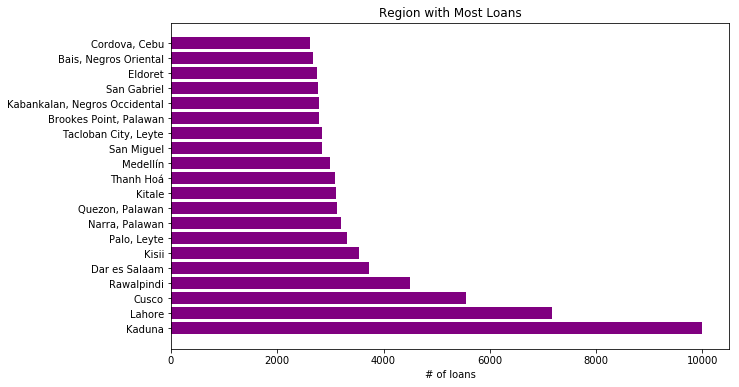

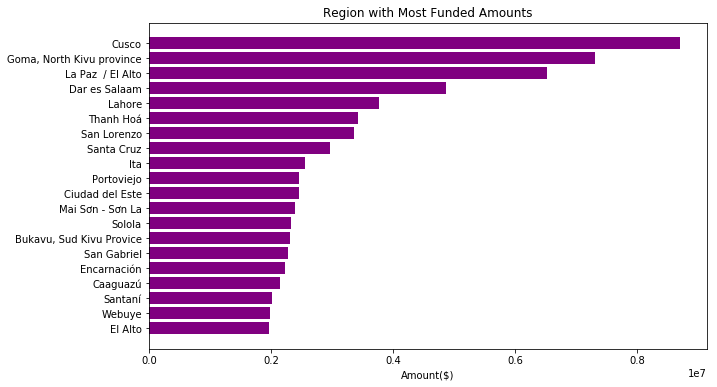

In [15]:
# Assuming 'kiva_loans' is your DataFrame

# Replace "CUSCO" with "Cusco" in the DataFrame
kiva_loans.replace("CUSCO", "Cusco", inplace=True)

# Matplotlib plot for loan counts
counts_data = kiva_loans['region'].value_counts().head(20).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(counts_data.index, counts_data.values, color='purple')
plt.xlabel('# of loans')
plt.title('Region with Most Loans')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

# Matplotlib plot for funded amounts
temp_data = kiva_loans.groupby(['region'])['funded_amount'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(temp_data.index, temp_data.values, color='purple')
plt.xlabel('Amount($)')
plt.title('Region with Most Funded Amounts')
plt.gca().invert_yaxis()
plt.show()

# Plotly subplot
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=["Region with Most Loans", 'Region with Most Funded Amounts']
)

# Plotly bar chart for loan counts
counts = go.Bar(
    y=counts_data.index,
    x=counts_data.values,
    orientation='h',
    marker=dict(color='green')
)
fig.add_trace(counts, row=1, col=1)

# Plotly bar chart for funded amounts
donation_amounts = go.Bar(
    y=temp_data.index,
    x=temp_data.values,
    orientation='h',
    marker=dict(color='blue')
)
fig.add_trace(donation_amounts, row=1, col=2)

# Update layout
fig.update_layout(
    height=600,
    showlegend=False,
    title='Regions with Most Loan Counts VS Funded Amounts'
)

# Show the plot
fig.show()


In [16]:
feature = "region"
temp = pd.DataFrame(round(kiva_loans[feature].value_counts(dropna = False, normalize=True)*100,2)).reset_index().rename(columns = {'index':feature,feature:"Percentage of Total"})
temp.dropna(inplace=True)
temp = temp.head(10)
print(" {} ".format(temp.columns[1]).center(40,"*"))
#print ("***** CompanySize *****".center(60, '*') )

for a, b in temp.itertuples(index=False):
    print("{}% loans are given to {}.".format(b, a))
print ('#####')
#print ('27.64 participants did not share an answer for this question')
#print ("Let's find out what they do..")
######
temp = pd.DataFrame(kiva_loans.groupby(['region'])['funded_amount'].sum().sort_values(ascending = False).head(20)).reset_index().rename(columns = {'index':feature,feature:"Percentage of Total Loan"})
temp.dropna(inplace=True)
temp = temp.head(10)
print(" {} ".format(temp.columns[1]).center(40,"*"))
#print ("***** CompanySize *****".center(60, '*') )

for a, b in temp.itertuples(index=False):
    print("{} loans are given to {}.".format(b, a))
#print ('#####')
#print ('27.64 participants did not share an answer for this question')
#print ("Let's find out what they do..")

********* Percentage of Total **********
1.49% loans are given to Kaduna.
1.07% loans are given to Lahore.
0.83% loans are given to Cusco.
0.67% loans are given to Rawalpindi.
0.55% loans are given to Dar es Salaam.
0.53% loans are given to Kisii.
0.49% loans are given to Palo, Leyte.
0.48% loans are given to Narra, Palawan.
0.46% loans are given to Quezon, Palawan.
0.46% loans are given to Kitale.
#####
************ funded_amount *************
8710625.0 loans are given to Cusco.
7320575.0 loans are given to Goma, North Kivu province.
6525925.0 loans are given to La Paz  / El Alto.
4867325.0 loans are given to Dar es Salaam.
3777750.0 loans are given to Lahore.
3429250.0 loans are given to Thanh Hoá.
3369500.0 loans are given to San Lorenzo.
2964550.0 loans are given to Santa Cruz.
2559775.0 loans are given to Ita.
2467075.0 loans are given to Portoviejo.


## Top Sectors with Most Loans 

In [17]:
temp = kiva_loans.sector.value_counts()

data = [go.Bar(
    x=temp.index,
    y=temp.values,
    #width = [0.9,0.9,0.9,0.7,0.7,0.7,0.7,0.7,0.7,0.7],## customizing the width.
    marker = dict(
        #color=['green', 'green', 'green']
    ),
    )]
layout = go.Layout(
    title = "Sectors with Highest Loan Counts",

    xaxis = dict(
        title = "Sectors",
        showgrid = True
    ),
    yaxis = dict( 
        title = '# of loans',
        showgrid = True,
        tickformat = ',d'
    )
)
fig = go.Figure(data = data, layout = layout)
fig.show()

#Alternative way of doing the same thing but really easy.
#sectors = kiva_loans.sector.value_counts().head(30)
#sectors.iplot(kind='bar', xTitle = 'State name', yTitle = "Count", title = 'Top Donor States')

**Agriculture, Food and Retail** are the top sectors with most loan counts.

## Top Sectors with Most Fundings

In [18]:
temp = kiva_loans.groupby(['sector'])['funded_amount'].sum().sort_values(ascending= False)
data = go.Bar(
    x = temp.index,
    y = temp.values
)
fig = go.Figure(data = data)
fig.layout.xaxis.title = 'Subject Subcategory Type'
fig.layout.yaxis.title = 'Project Count'
# fig.update_layout(template = 'plotly_dark')
fig.show()



Similar to previous chart **Agriculture, Food and Retail** are the top sectors with most loan amounts.

## Top Activities  

In [19]:
temp = kiva_loans.activity.value_counts().head(20)

data = [go.Bar(
    x=temp.index,
    y=temp.values,
    #width = [1.1, 1.1],## customizing the width.
    marker = dict(
        #color=['green', 'green']
    ),
    )]
layout = go.Layout(
    title = "Top activities of Loans",
    xaxis = dict(
        title = "Activities"
    ),
    yaxis = dict( 
        title = '# of loans', 
        tickformat = ',d'
    )
)
fig = go.Figure(data = data, layout = layout)
fig.show()

**Farming & General Store** are the top activities done by loan borrowers. 

## Borrower's repayment interval 

In [20]:
temp = kiva_loans.repayment_interval.value_counts()

labels = temp.index
values = temp.values
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

data = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='percent',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))
layout = go.Layout(
    title = "Pie Chart for Repayment Interval",
)

fig = go.Figure(data = [data], layout = layout)
fig.show()

**More than half of the payment intervals are monthly**, there are also irregular, bullet and small percentage of weekly payments.**

## 6.7 Terms in Months

In [21]:
## Most Loans Period in terms of Months.

temp = kiva_loans.term_in_months.value_counts().head(25)

data = [go.Bar(
    x=temp.index,
    y=temp.values,
    #width = [1.1, 1.1],## customizing the width.
    marker = dict(
        color=['green', 'green', 'green']),
    )]
layout = go.Layout(
    title = "Loan period in terms of Months",
    xaxis = dict(
        title = "Activities"
    ),
    yaxis = dict( 
        title = 'Loans', 
        tickformat = ',d'
    )
)
fig = go.Figure(data = data, layout = layout)
fig.show()

Most of the loan payments are constructed to last for either **8 month or 14 months.**

## 6.8 Top Uses of the Loans

In [22]:
## I noticed that some of the data is inconsistant and are basically repeated because of upper/lower case difference. 
kiva_loans.use = kiva_loans.use.str.lower()
## Also I stumbled upon lines where the only difference is a ".". So, I got rid of the difference. 
kiva_loans.use = kiva_loans.use.str.strip('.')
## Its always a good idea to get rid of any extra white spaces. 
kiva_loans.use = kiva_loans.use.str.strip()
kiva_loans.use = kiva_loans.use.str.strip('.')

##There are different version so saying the same thing. therefore I have decided to merge them all together. 
kiva_loans.replace('to buy a water filter to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water for her family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water for his family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water for the family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter, to provide safe drinking water for her family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter, to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water for their families', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to purchase a water filter to provide safe drinking water for the family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to purchase a water filter to provide safe drinking water', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter in order to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)




In [23]:
##Plotly graphs stats here
temp = kiva_loans.use.value_counts().head(20)

data = [go.Bar( x=temp.index,
    y=temp.values,
    width = [1.0,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7],## customizing the width.
    marker = dict(
        color=['rgb(0, 200, 200)', 'black','black','black','black','black','black','black','black','black','black','black','black']),
    )]
layout = go.Layout(
    title = "Top Uses of the Loans",
    height = 800,
    margin=go.layout.Margin(b =340, r = 250),## this is so we are able to read the labels in xaxis. 'b' stands for bottom, similarly left(l), 
                            ##right(r),top(t) 
    xaxis = dict(
        title = "Uses"
    ),
    yaxis = dict( 
        title = 'Loans',
        tickformat = ',d',

    )
)
fig = go.Figure(data = data, layout = layout)
fig.show()


It is spectacular to see that, almost **16,000 people took loans just to buy filter so that they can get access to safe drinking water.** I am interested in finding out which countries these peoples are from.

### Countries where Loan was used to Buy Water Filter 

In [24]:
temp = kiva_loans[kiva_loans.use == "to buy a water filter to provide safe drinking water for his/her/their family"].country.value_counts()

data = go.Bar(
    x = temp.index,
    y = temp.values
)
fig = go.Figure(data = data)
fig.layout.xaxis.title = 'Subject Subcategory Type'
fig.layout.yaxis.title = 'Project Count'
# fig.update_layout(template = 'plotly_dark')
fig.show()

It turns out that, most of the people who took loans to buy filter for safe drinking water are from Cambodia. That's quite interesting. Let's do a little research about this situation in Cambodia.  

### Loan uses in Cambodia

In [25]:
temp = kiva_loans[kiva_loans.country == 'Cambodia'].use.value_counts().head(20)

data = [go.Bar(
    x=temp.index,
    y=temp.values,
    width = [1.0,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7],## customizing the width.,
    marker = dict(
        color=['rgb(0, 200, 200)']),
    )]
layout = go.Layout(
    title = "Top Uses of the Loans in Cambodia",
    height = 800,
    margin=go.layout.Margin(b =350, r = 250),## this is so we are able to read the labels in xaxis. 'b' stands for bottom, similarly left(l), 
                            ##right(r),top(t) 
    xaxis = dict(
        title = "Uses"
    ),
    yaxis = dict( 
        title = 'Loans',
        tickformat = ',d',

    )
)
fig = go.Figure(data = data, layout = layout)
fig.show()

In [26]:
temp = kiva_loans[kiva_loans.country == 'Cambodia'].use.value_counts().head(20)
feature = "use"
temp = pd.DataFrame(temp).reset_index().rename(columns = {'index':feature,feature:"Total Loans"})
temp.dropna(inplace=True)
temp = temp.head(10)
print(" {} ".format(temp.columns[1]).center(90,"*"))
#print ("***** CompanySize *****".center(60, '*') )

for a, b in temp.itertuples(index=False):
    print("{} loans are given to {}.".format(b, a))

************************************** Total Loans ***************************************
15587 loans are given to to buy a water filter to provide safe drinking water for his/her/their family.
390 loans are given to to buy fertilizers and seeds for her farmland.
312 loans are given to to build a latrine.
170 loans are given to to buy fertilizers for her farmland.
136 loans are given to to build a decent latrine.
133 loans are given to to buy a motorbike.
126 loans are given to to buy fertilizer for her farmland.
109 loans are given to to pay for a solar home system.
100 loans are given to to buy fertilizer and seeds for her farmland.
92 loans are given to to build a hygienic latrine.


**Out of all the loans provided in Cambodia, ~45%(15,587) were taken by borrowers only to buy a filter for safe drinking water. This is one of the instances where KIVA is directly aiding lots of people to meet one of their most important basic needs. If you would like to know more about the water crisis in Cambodia, please click [here](https://water.org/our-impact/cambodia/) .**

**Let's create a workcloud with all the loans taken by Cambodians...**

### Wordcloud of Loan uses in Cambodia

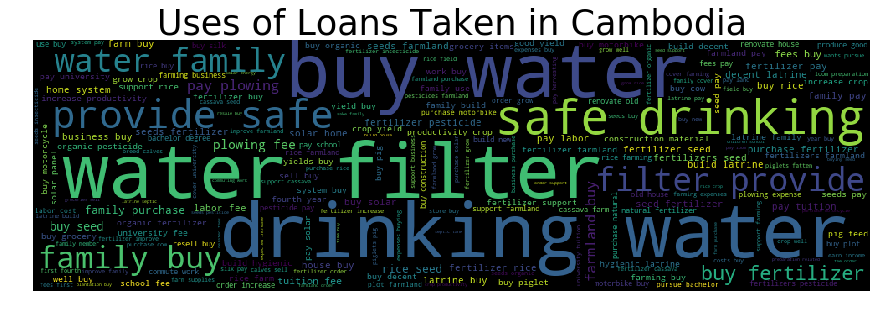

In [27]:
from wordcloud import WordCloud

loans_cambodia = kiva_loans[kiva_loans.country == 'Cambodia']
names = loans_cambodia["use"][~pd.isnull(kiva_loans["use"])]
#print(names)
wordcloud = WordCloud(max_font_size=90, width=1000, height=300).generate(' '.join(names))
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.title("Uses of Loans Taken in Cambodia", fontsize=35)
plt.axis("off")
plt.show() 

**This word cloud looks a bit more intuitive and demonstrates meaningful necessity to purchase a filter for reliable drinking water in Cambodia.**

**Cambodia** is just one of the numerous countries where people require support. I am curious about finding out where KIVA is exceptionally beneficial along with those realms where KIVA is nearly not that effective. I am also intrigued in finding out how Kiva contributors have preferred the projects they want to support with their money. Let's visualize some of the important features of a country that used to helps us to identify the growths of a countries development status like population and GDP per capita. After that we will dive deep into Human Development Index(HDI) which is an imporved version of rating a countries growth.

## Population and all things
### Population

In [28]:
data = [dict(
        type='choropleth',
        locations= country_stats.country_name,
        locationmode='country names',
        z=country_stats.population,
        text=country_stats.country_name,
#         colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False, 
            tickprefix='', 
            title='Polulations'),
)]
layout = dict(title = 'Population Map of the world',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [29]:
temp = country_stats[['country_name','population']].sort_values(by ='population', ascending = False).head(15)
data = [go.Bar(
    x = temp.country_name,
    y = temp.population,
    marker = dict(line = dict(width = 2))
)]
layout = go.Layout(
    paper_bgcolor='rgb(243, 243, 200)',## asix and lebel background color
    plot_bgcolor='rgb(243, 243, 200)', ## plot background color
    title = 'Top Countries with most people',
    xaxis =dict(title = 'Country'),
    yaxis =dict(title = 'Amount of Population'),
    margin = dict(b = 200)
    
)
fig = go.Figure(data = data, layout =layout)
fig.show()

As expected **China and India** are the top populated countries followed by **United States.** However, my attention is geared towards **Pakistan, Nigeria, Bangladesh, Ethiopia and Philippines** from this list as they are some of the developing countries and managed to be a part of this chart. Let's see how these country stands in the *population below poverty line* scale.

### Top Populated Countries with Population density and Population Below Poverty Line Scale

In [30]:
countries.replace("Congo, Dem. Rep.", 'Democratic Republic of the Congo', inplace=True)
##
countries.rename(columns = {'GDP ($ per capita)':"GDP"}, inplace = True)
countries.rename(columns = {'Pop. Density (per sq. mi.)':"pop_density_per_sq_mile"}, inplace = True)
countries.pop_density_per_sq_mile = countries.pop_density_per_sq_mile.apply(lambda x: int(x.replace(",","")))
countries.Country = countries.Country.apply(lambda x:x.strip())
country_stats = country_stats.merge(countries[['Country',"GDP",'pop_density_per_sq_mile']], left_on ='country_name',right_on='Country', how='left')

##

In [31]:
temp = country_stats[['kiva_country_name','pop_density_per_sq_mile','population','population_below_poverty_line']].sort_values(by = 'population', ascending = False).head(14)
for col in temp.columns:
    temp[col] = temp[col].astype(str)
# writing the text column
temp['text'] = temp['kiva_country_name'] + '<br>' + 'Population Density(per sq/ml): ' + temp['pop_density_per_sq_mile'] + '<br>' + 'Total Populations: ' + temp['population'] + '<br>' + 'Population Below Poverty Line: ' + temp['population_below_poverty_line']
# this is for the size part of the chart
temp['pop_density_per_sq_mile'] = temp['pop_density_per_sq_mile'].astype(float)
#states['text'] = states.apply(lambda x: (states['Donor State']+ '<br>' + "Mean Donations:" + states['Mean Donation Amount'] + '<br>' + "Total Donors:" + states['total_donors'] + "<br" + "Total Donations:" + states['Donation Amount']))
#states.text = states.text.astype(str)
temp['population_below_poverty_line'] = temp['population_below_poverty_line'].astype(float)
trace0 = go.Scatter(
    x=temp.population,
    y=temp.population_below_poverty_line,
    text = temp.text,
    mode='markers',
    marker = {
            'color': temp.population_below_poverty_line.tolist(),
            #'colorscale':"RdYlGn",
            'size': (temp.pop_density_per_sq_mile/80).tolist(),
            'showscale': False, 
            'line': dict(width=2, color='black')
        }
)
layout = go.Layout(
    paper_bgcolor='rgb(243, 243, 200)',## asix and lebel background color
    plot_bgcolor='rgb(243, 243, 200)', ## plot background color
    title = "Population, Population Density and Population Below Poverty Line",
    height = 800,
    xaxis = dict(
        title = "Population"
    ),
    yaxis = dict(
        title = "Population Below Poverty Line"
    )

)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig.show()

The big circle is the first thing to take my attention. Here the **size of the circle** represents the **population density** of each country while x and y-axis represent population and population below poverty line consecutively. That represents **Bangladesh** which is not only one of the countries with top populations but also one of the most densely populated countries in the world. In addition to that **Bangladesh** has a score of 31.5 in the *Population below poverty line* scale. Speaking of that scale, **Nigeria** is the poorest county with lots of people to appreciate assistance from KIVA. I am interested in looking into more in-depth about how KIVA is helping out the people in these two countries. But for now, let's see an overview of how other nations fall in the ***Population below poverty line* **scale.

### Population Below Poverty Line

In [32]:
data = [dict(
        type='choropleth',
        locations= country_stats.country_name,
        locationmode='country names',
        z=country_stats.population_below_poverty_line,
        text=country_stats.country_name,
        marker=dict(
#             colorscale='Red',
            line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False, 
            tickprefix='', 
            title='Polulation<br>below<br>poverty<br>line'),
)]
layout = dict(title = 'Population Below Poverty Line',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

Most of the countries in **Africa** lives way below poverty line. aThis may be a good time to bring up GDP per capita since they are nege.Let's create a map for that as well. 

### <a id="6.9.4">6.9.4 GDP Per Capita</a>

In [33]:
temp = countries[['Country',"GDP"]].sort_values(by = 'GDP', ascending = False)
data = [dict(
        type='choropleth',
        locations= temp.Country,
        locationmode ='country names',
        z=temp.GDP,
        text=temp.Country,
        colorscale='BuGn',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False, 
            tickprefix='', title='GDP<br>Per<br>Capita'),
)]
layout = dict(title = 'World countries with polulations',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

**North American, Austraila and European** countries are the one with highest GDP Per Capita. Meanwhile countries in **Africa and Asia** are the once with lowest GDP Per Capita. 

### <a id="6.9.5">6.9.5 Let's Combine All the Features</a>

In [34]:
temp = country_stats[['kiva_country_name','pop_density_per_sq_mile',"GDP",'population','population_below_poverty_line']].sort_values(by = 'population', ascending = False).head(14)
for col in temp.columns:
    temp[col] = temp[col].astype(str)
# writing the text column
temp['text'] = temp['kiva_country_name'] + '<br>' +"GDP Per Capita: "+temp["GDP"]+"<br>"+'Population Density(per sq/ml): ' + temp['pop_density_per_sq_mile'] + '<br>' + 'Total Populations: ' + temp['population'] + '<br>' + 'Population Below Poverty Line: ' + temp['population_below_poverty_line']
# this is for the size part of the chart
temp['pop_density_per_sq_mile'] = temp['pop_density_per_sq_mile'].astype(float)
#states['text'] = states.apply(lambda x: (states['Donor State']+ '<br>' + "Mean Donations:" + states['Mean Donation Amount'] + '<br>' + "Total Donors:" + states['total_donors'] + "<br" + "Total Donations:" + states['Donation Amount']))
#states.text = states.text.astype(str)
temp['population'] = temp['population'].astype(float)
trace0 = go.Scatter(
    x=temp.GDP,
    y=temp.population_below_poverty_line,
    text = temp.text,
    mode='markers',
    #colorbar=dict(autotick=False, tickprefix='', title='Polulation<br>below<br>poverty<br>line'),
    marker = {
            'color': temp.population.tolist(),
            #'colorscale':RdYlGn,
            'colorbar' : dict(title = "Population"),
            'size': (temp.pop_density_per_sq_mile/80).tolist(),
            'showscale': True,
            'line': dict(width =2, color ='black')
        }
)
layout = go.Layout(
    paper_bgcolor='rgb(243, 243, 200)',## asix and lebel background color
    plot_bgcolor='rgb(243, 243, 200)', ## plot background color
    title = "Top 15 Populated Countries with Population Density and Population Below Poverty Line",
    height = 800,
    xaxis = dict(
        title = "GDP Per Capita"
    ),
    yaxis = dict(
        title = "Population Below Poverty Line"
    )

)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig.show()

This bubble chart is similar to the one before. The only exception is that I have replaced **population** to colorbar and added **GDP Per Capita** in the x-axis. Many countries are with less GDP Per Capita, and higher population below poverty line score and these are the once in need of support. Such countries are **Nigeria, Bangladesh and Ethiopia.**  Densely populated countries with less GDP Per Capita are also the one in need of loan assistance. For example, **Bangladesh** where **~10,500** people lives per square mile and to make things worse the GDP Per Capita is only **\$1900**. I am curious about looking into more densely populated countries and updating more on this in coming up kernels.

### <a id="6.9.6">6.9.6 Top Most Funded Countries by KIVA</a>

In [35]:
## Getting info(population density, GDP, Population and population below poverty line) from country_stats dataframe. 
temp = country_stats[['kiva_country_name','pop_density_per_sq_mile',"GDP",'population','population_below_poverty_line']].sort_values(by = 'population', ascending = False)

## Getting the top 15 funded countries and the funded amount according to Kiva_loans dataset. 
most = kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending = False).reset_index().head(14)

temp = temp.merge(most, how = 'inner',left_on='kiva_country_name', right_on='country' ).sort_values(by = 'funded_amount', ascending = False)
temp.dropna(inplace=True)                                                                                  


for col in temp.columns:
    temp[col] = temp[col].astype(str)
# writing the text column
temp['text'] = temp['kiva_country_name'] +"<br>"+"Funded Amount: "+temp["funded_amount"]+ '<br>' +"GDP Per Capita: "+temp["GDP"]+"<br>"+'Population Density(per sq/ml): ' + temp['pop_density_per_sq_mile'] + '<br>' + 'Total Populations: ' + temp['population'] + '<br>' + 'Population Below Poverty Line: ' + temp['population_below_poverty_line']
# this is for the size part of the chart
temp['pop_density_per_sq_mile'] = temp['pop_density_per_sq_mile'].astype(float)
#states['text'] = states.apply(lambda x: (states['Donor State']+ '<br>' + "Mean Donations:" + states['Mean Donation Amount'] + '<br>' + "Total Donors:" + states['total_donors'] + "<br" + "Total Donations:" + states['Donation Amount']))
#states.text = states.text.astype(str)
temp['funded_amount']  = temp['funded_amount'].astype(float)
trace0 = go.Scatter(
    x=temp.GDP,
    y=temp.population_below_poverty_line,
    text = temp.text,
    mode='markers',
    #colorbar=dict(autotick=False, tickprefix='', title='Polulation<br>below<br>poverty<br>line'),
    marker = {
            'color': temp.funded_amount.tolist(),
            'colorscale':"Greens",
            'reversescale': True,
            'colorbar' : dict(title = "Funded<br>Amount<br>"),
            'size': (temp.pop_density_per_sq_mile/40).tolist(),
            'showscale': True, 
        'line': dict(width =2, color ='black')
        }
)
layout = go.Layout(
    title = "Top Most Funded Countries by KIVA",
    height = 800,
    xaxis = dict(
        title = "GDP Per Capita"
    ),
    yaxis = dict(
        title = "Polulation Below Poverty Line"
    ),
    paper_bgcolor='rgb(243, 243, 200)',
    plot_bgcolor='rgb(243, 243, 200)',

)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig.show()

This is a chart of top-funded countries by KIVA with their GDP per Capita, funded amount, population below poverty line and population density per square mile. Since this a KIVA related chart, we replaced **population** feature with **funded amount** on colorbar.

It is safe to assume that most of the highly loan received countries would fall on the top left region of the chart since that is the spot of countries with least GDP per capita and higher population below poverty line rate. An excellent example for that country is **Kenya**, and as the color suggests, KIVA loaners have already been contributing a significant amount to this country. **Rwanda** is another country with high population below poverty line and low GDP per Capita. To make things even worse, it is one of the most densely populated countries in the world. It is good to see that KIVA is doing their part to help out the people of Rwanda. 

### <a id="6.9.7">6.9.7 Top Least Funded Countries by KIVA</a>

In [36]:
## Getting info(population density, GDP, Population and population below poverty line) from country_stats dataframe. 
temp = country_stats[['kiva_country_name','pop_density_per_sq_mile',"GDP",'population','population_below_poverty_line']].sort_values(by = 'population', ascending = False)

## Getting the top 15 funded countries and the funded amount according to Kiva_loans dataset. 
least = kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending = False).reset_index().tail(20)

temp = temp.merge(least, how = 'inner',left_on='kiva_country_name', right_on='country' ).sort_values(by = 'funded_amount', ascending = False)
                                                                                            


for col in temp.columns:
    temp[col] = temp[col].astype(str)
# writing the text column
temp['text'] = temp['kiva_country_name'] +"<br>"+"Funded Amount: "+temp["funded_amount"]+ '<br>' +"GDP Per Capita: "+temp["GDP"]+"<br>"+'Population Density(per sq/ml): ' + temp['pop_density_per_sq_mile'] + '<br>' + 'Total Populations: ' + temp['population'] + '<br>' + 'Population Below Poverty Line: ' + temp['population_below_poverty_line']
# this is for the size part of the chart
temp['pop_density_per_sq_mile'] = temp['pop_density_per_sq_mile'].astype(float)
#states['text'] = states.apply(lambda x: (states['Donor State']+ '<br>' + "Mean Donations:" + states['Mean Donation Amount'] + '<br>' + "Total Donors:" + states['total_donors'] + "<br" + "Total Donations:" + states['Donation Amount']))
#states.text = states.text.astype(str)
temp['funded_amount'] = temp['funded_amount'].astype(float)
temp.dropna(inplace = True)
trace0 = go.Scatter(
    x=temp.GDP,
    y=temp.population_below_poverty_line,
    text = temp.text,
    mode='markers',
    #colorbar=dict(autotick=False, tickprefix='', title='Polulation<br>below<br>poverty<br>line'),
    marker = {
            'color': temp.funded_amount.tolist(),
            'colorscale':"Greens",
            'reversescale': True,
            'colorbar' : dict(title = "Funded<br>Amount<br>"),
            'size': (temp.pop_density_per_sq_mile/40).tolist(),
            'showscale': True, 
        'line': dict(width =2, color ='black')
        }
)
layout = go.Layout(
    title = "Least Funded Countries by KIVA",
    height = 800,
    xaxis = dict(
        title = "GDP Per Capita"
    ),
    yaxis = dict(
        title = "Polulation Below Poverty Line"
    ),
    paper_bgcolor='rgb(243, 243, 200)',
    plot_bgcolor='rgb(243, 243, 200)',

)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig.show()

### <a id="6.9.8">6.9.8 All Countries Funded by KIVA</a>

In [37]:
## Getting info(population density, GDP, Population and population below poverty line) from country_stats dataframe. 
temp = country_stats[['kiva_country_name','pop_density_per_sq_mile',"GDP",'population','population_below_poverty_line']].sort_values(by = 'population', ascending = False)

## Getting the top 15 funded countries and the funded amount according to Kiva_loans dataset. 
most = kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending = False).reset_index()

temp = temp.merge(most, how = 'inner',left_on='kiva_country_name', right_on='country' ).sort_values(by = 'funded_amount', ascending = False)
                                                                                     

for col in temp.columns:
    temp[col] = temp[col].astype(str)
# writing the text column
temp['text'] = temp['kiva_country_name'] +"<br>"+"Funded Amount: "+temp["funded_amount"]+ '<br>' +"GDP Per Capita: "+temp["GDP"]+"<br>"+'Population Density(per sq/ml): ' + temp['pop_density_per_sq_mile'] + '<br>' + 'Total Populations: ' + temp['population'] + '<br>' + 'Population Below Poverty Line: ' + temp['population_below_poverty_line']
# this is for the size part of the chart
temp['pop_density_per_sq_mile'] = temp['pop_density_per_sq_mile'].astype(float)
#states['text'] = states.apply(lambda x: (states['Donor State']+ '<br>' + "Mean Donations:" + states['Mean Donation Amount'] + '<br>' + "Total Donors:" + states['total_donors'] + "<br" + "Total Donations:" + states['Donation Amount']))
#states.text = states.text.astype(str)
temp['funded_amount'] = temp['funded_amount'].astype(float)
temp.dropna(inplace = True)    


trace0 = go.Scatter(
    x=temp.GDP,
    y=temp.population_below_poverty_line,
    text = temp.text,
    mode='markers',
    #colorbar=dict(autotick=False, tickprefix='', title='Polulation<br>below<br>poverty<br>line'),
    marker = {
            'color': temp.funded_amount.tolist(),
            'colorscale':"Greens",
            'reversescale': True,
            'colorbar' : dict(title = "Funded<br>Amount<br>"),
            'size': (temp.pop_density_per_sq_mile/40).tolist(),
            'showscale': True,
            'line': dict(width = 2, color = 'black')
        }
)
layout = go.Layout(
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    title = "Countries Funded by KIVA",
    height = 800,
    xaxis = dict(
        title = "GDP Per Capita",
        gridcolor='rgb(255, 255, 255)',
        type = 'log',
        ticklen = 5,
        gridwidth =2,
    ),
    yaxis = dict(
        title = "Polulation Below Poverty Line",
        gridcolor='rgb(255, 255, 255)',
        ticklen = 5, 
        gridwidth =2,
    )

)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig.show()

This chart above is presumably a better one to look at and to read. The chart shows all the countries that KIVA has donated and uses *log* type so that we can see the data spread out. It is essential to use x-ticks to understand the distance between points(countries) rather than just looking at the points(countries) itself. Here the **size still represents population density** since density has a better implication of distinguishing a country's prosperity than population. 



### <a id="6.9.9">6.9.9 Countries Funded by KIVA </a>

In [38]:
import math
## Getting info(population density, GDP, Population and population below poverty line) from country_stats dataframe. 
temp = country_stats[['kiva_country_name','continent','pop_density_per_sq_mile',"GDP",'population','population_below_poverty_line']].sort_values(by = 'population', ascending = False)

## Getting the top 15 funded countries and the funded amount according to Kiva_loans dataset. 
most = kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending = False).reset_index()

## merging funded amount with temp dataframe. 
temp = temp.merge(most, how = 'inner',left_on='kiva_country_name', right_on='country' ).sort_values(by = 'funded_amount', ascending = False)
temp = temp.sort_values(['continent', 'kiva_country_name'])

slope = 2.666051223553066e-05
hover_text = []
bubble_size = []

for index, row in temp.iterrows():
    hover_text.append(('Country: {kiva_country_name}<br>'+
                      'Funded Amount: {funded_amount}<br>'+
                      'GDP per capita: {GDP}<br>'+
                      'Population: {population}<br>'+
                      'Population Density: {pop_density_per_sq_mile}').format(kiva_country_name=row['kiva_country_name'],
                                            funded_amount=row['funded_amount'],
                                            GDP=row['GDP'],
                                            population=row['population'],
                                            pop_density_per_sq_mile=row['pop_density_per_sq_mile']))
    bubble_size.append(math.sqrt(row['population']*slope))

temp['text'] = hover_text
temp['size'] = bubble_size
sizeref = 2.*max(temp['size'])/(100**2)

trace0 = go.Scatter(
    x=temp['GDP'][temp['continent'] == 'Africa'],
    y=temp['funded_amount'][temp['continent'] == 'Africa'],
    mode='markers',
    name='Africa',
    text=temp['text'][temp['continent'] == 'Africa'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=temp['size'][temp['continent'] == 'Africa'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=temp['GDP'][temp['continent'] == 'Americas'],
    y=temp['funded_amount'][temp['continent'] == 'Americas'],
    mode='markers',
    name='Americas',
    text=temp['text'][temp['continent'] == 'Americas'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=temp['size'][temp['continent'] == 'Americas'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=temp['GDP'][temp['continent'] == 'Asia'],
    y=temp['funded_amount'][temp['continent'] == 'Asia'],
    mode='markers',
    name='Asia',
    text=temp['text'][temp['continent'] == 'Asia'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=temp['size'][temp['continent'] == 'Asia'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=temp['GDP'][temp['continent'] == 'Europe'],
    y=temp['funded_amount'][temp['continent'] == 'Europe'],
    mode='markers',
    name='Europe',
    text=temp['text'][temp['continent'] == 'Europe'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=temp['size'][temp['continent'] == 'Europe'],
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=temp['GDP'][temp['continent'] == 'Oceania'],
    y=temp['funded_amount'][temp['continent'] == 'Oceania'],
    mode='markers',
    name='Oceania',
    text=temp['text'][temp['continent'] == 'Oceania'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        sizeref=sizeref,
        size=temp['size'][temp['continent'] == 'Oceania'],
        line=dict(
            width=2
        ),
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Funded Amount v. GDP Per Capita',
    xaxis=dict(
        title='GDP per capita',
        gridcolor='rgb(255, 255, 255)',
        #range=[2.003297660701705, 5.191505530708712],
        type='log', ## spreads the points throughout the plot using log in the axis
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Funded Amount',
        gridcolor='rgb(255, 255, 255)',
        #range=[36.12621671352166, 91.72921793264332],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
fig.show()

This is yet another interesting bubble chart and it shows the distinction of GDP Per Capita among countries and this time it is color coted according to continants. As we use this interective visualization above we realize that countries in American continents are much more better off than Asia or Africa. We can click in the level(continent) names to compare and contrust amoug particular continents. 

## <a id="6.10">6.10 Human Development Index(HDI)</a>

The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities.
                                                                                                                            The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. Refer to Technical notes for more details.

The HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. The HDRO offers the other composite indices as broader proxy on some of the key issues of human development, inequality, gender disparity and poverty.

A fuller picture of a country's level of human development requires analysis of other indicators and information presented in the statistical annex of the report.
![image](http://hdr.undp.org/sites/default/files/hdi.png)

In [ ]:
country_stats['education_index'] = ((country_stats.expected_years_of_schooling+country_stats.mean_years_of_schooling)/2)

country_stats.dropna(inplace=True)
data = [dict(
        x = country_stats.life_expectancy.tolist(),
        y = country_stats.population_below_poverty_line.tolist(),
        mode = 'markers',
        text = country_stats.country_name,
        marker = {
            'color': country_stats.population.tolist(),
            'colorscale':"Viridis",
            'size': (country_stats.hdi*30).tolist(),
            'showscale': True
        })]
    
layout = go.Layout(
    title = "Human Development Index(HDI), Education Index(EI), Income Index(GNI) and Life Expectancy Index(LEI)",
    height = 1200,
    xaxis = dict(
        title = "Life Expectency"
    ),
    yaxis = dict(
        title = "GNI Index"
    )

)

fig = go.Figure(data = data, layout = layout)
fig.show()

# Male-Female Ratio

In [ ]:
temp = pd.DataFrame(kiva_loans.borrower_genders.dropna().str.split(",").tolist()).stack().value_counts().reset_index()
temp.rename(columns={'index':'gender', 0:'total'}, inplace=True)
temp.gender = temp.gender.apply(lambda x: x.strip())
temp = temp.groupby(['gender'])['total'].sum().reset_index()

labels = temp.gender
values = temp.total
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

data = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='percent',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))
layout = go.Layout(
    title = "Pie Chart for Repayment Interval",
)

fig = go.Figure(data = [data], layout = layout)
fig.show()

Borrower's are mostly **Female(79.8%)**
